### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [4]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [5]:
corr_df=df[all_features].corr()

In [6]:
corr_df

,company,country,director,genre,rating,star,year,writer,budget,runtime,score,votes,popularity,budget_norm,runtime_norm,score_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,-0.013090,0.015980,-0.067707,-0.035473,0.022474,0.009746,0.003733,0.079051,0.036737,-0.003223,0.004567,-0.011936,0.079051,0.036737,-0.003223,0.004567,-0.011936,-0.038838,-0.026738
country,-0.013090,1.000000,-0.007243,0.034910,0.024357,-0.013602,0.007523,-0.093787,0.126986,-0.037793,-0.118752,0.074981,0.075040,0.126986,-0.037793,-0.118752,0.074981,0.075040,0.156762,0.190426
director,0.015980,-0.007243,1.000000,0.072873,-0.001392,0.042772,-0.042837,0.139519,0.003903,0.020869,0.084829,0.067372,-0.001873,0.003903,0.020869,0.084829,0.067372,-0.001873,0.012513,-0.000897
genre,-0.067707,0.034910,0.072873,1.000000,0.159076,0.010876,-0.075865,-0.033624,-0.377570,-0.012568,0.089665,-0.141506,-0.166315,-0.377570,-0.012568,0.089665,-0.141506,-0.166315,0.098722,0.095780
rating,-0.035473,0.024357,-0.001392,0.159076,1.000000,0.040568,0.070373,-0.012383,-0.264938,0.159248,0.155097,0.136732,-0.055597,-0.264938,0.159248,0.155097,0.136732,-0.055597,-0.135264,-0.143303
star,0.022474,-0.013602,0.042772,0.010876,0.040568,1.000000,-0.018655,0.018154,0.005204,0.028426,0.036114,0.052301,0.012286,0.005204,0.028426,0.036114,0.052301,0.012286,-0.019008,0.009492
year,0.009746,0.007523,-0.042837,-0.075865,0.070373,-0.018655,1.000000,0.019492,0.025814,-0.000044,0.024034,0.080711,0.113876,0.025814,-0.000044,0.024034,0.080711,0.113876,-0.037011,-0.065174
writer,0.003733,-0.093787,0.139519,-0.033624,-0.012383,0.018154,0.019492,1.000000,-0.027208,0.024361,0.016836,-0.009039,-0.036036,-0.027208,0.024361,0.016836,-0.009039,-0.036036,-0.016790,0.020289
budget,0.079051,0.126986,0.003903,-0.377570,-0.264938,0.005204,0.025814,-0.027208,1.000000,0.227837,-0.103827,0.381706,0.304581,1.000000,0.227837,-0.103827,0.381706,0.304581,-0.010955,-0.046753
runtime,0.036737,-0.037793,0.020869,-0.012568,0.159248,0.028426,-0.000044,0.024361,0.227837,1.000000,0.389517,0.256113,0.119732,0.227837,1.000000,0.389517,0.256113,0.119732,-0.058895,-0.069413


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

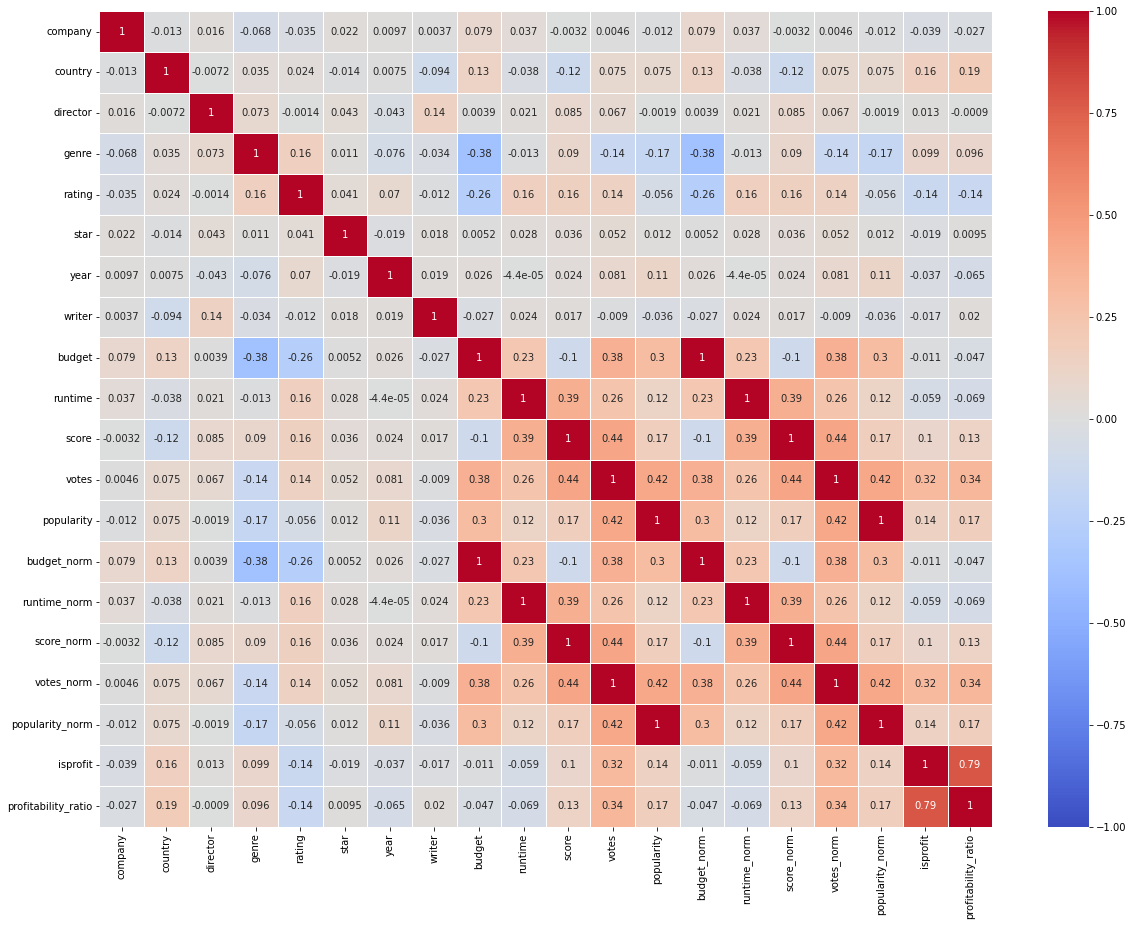

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [8]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,18]<-0.04 or corr_df.iloc[i,18]>0.04 or \
        corr_df.iloc[i,19]<-0.04 or corr_df.iloc[i,19]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [9]:
corr_df_features

{'budget',
 'budget_norm',
 'country',
 'genre',
 'popularity',
 'popularity_norm',
 'rating',
 'runtime',
 'runtime_norm',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'year'}

In [10]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')